In [7]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import skew, kurtosis


#IMPORT TRAIN AND TEST SETS
train_features = pd.read_csv('./data/derived/feature_selection/training_data.csv', index_col=0)
test_features = pd.read_csv('./data/derived/feature_selection/test_data.csv', index_col=0)
combined = pd.concat([train_features, test_features])


#http://fmwww.bc.edu/repec/bocode/t/transint.html

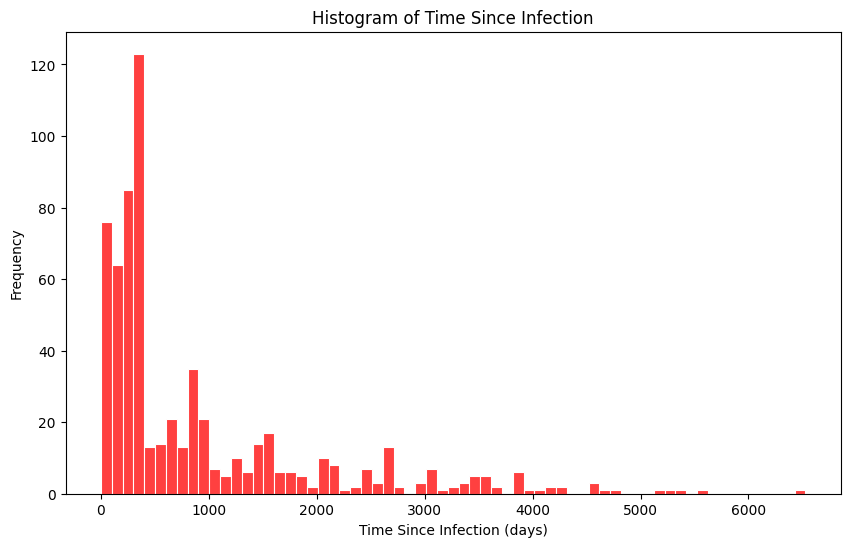

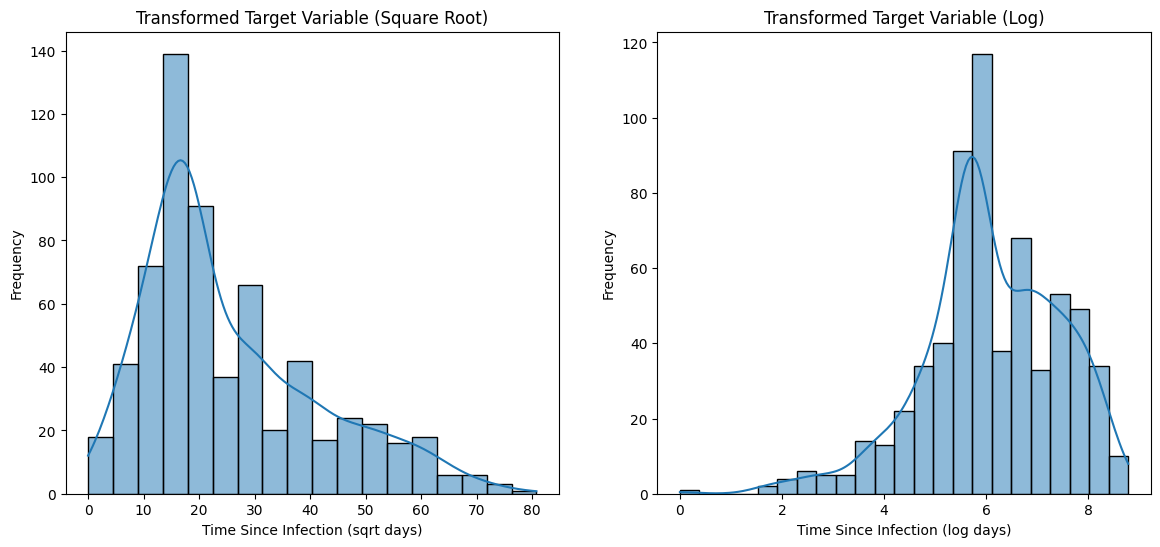

In [11]:
#histogram of TSI 
plt.figure(figsize=(10, 6))
sns.histplot(combined['TSI_days'], binwidth=100, color="red", kde=False, edgecolor="white")
plt.title("Histogram of Time Since Infection")
plt.xlabel("Time Since Infection (days)")
plt.ylabel("Frequency")
plt.savefig('./outputs/EDA/tsi_histogram.png')
plt.show()

# right skewed distribution with a long tail 

#transformations to address right-skewdness
sqrt_transformation = np.sqrt(combined['TSI_days'])
log_transformation = np.log1p(combined['TSI_days'])

# Plotting transformed target variable
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.histplot(sqrt_transformation, kde = True)
plt.title('Transformed Target Variable (Square Root)')
plt.xlabel("Time Since Infection (sqrt days)")
plt.ylabel("Frequency")


plt.subplot(1, 2, 2)
sns.histplot(log_transformation, kde = True)
plt.title('Transformed Target Variable (Log)')
plt.xlabel("Time Since Infection (log days)")
plt.ylabel("Frequency")

plt.savefig('./outputs/EDA/transformed_tsi_histogram.png')
plt.show()


In [9]:
target_variable = combined['TSI_days']

original_skewness = skew(target_variable)
original_kurtosis = kurtosis(target_variable)
print(f'Original Target Variable - Skewness: {original_skewness:.4f}, Kurtosis: {original_kurtosis:.4f}')

# Calculating skewness and kurtosis for square root transformation
sqrt_skewness = skew(sqrt_transformation)
sqrt_kurtosis = kurtosis(sqrt_transformation)
print(f'Square Root Transformation - Skewness: {sqrt_skewness:.4f}, Kurtosis: {sqrt_kurtosis:.4f}')

# Calculating skewness and kurtosis for logarithmic transformation
log_skewness = skew(log_transformation)
log_kurtosis = kurtosis(log_transformation)
print(f'Logarithmic Transformation - Skewness: {log_skewness:.4f}, Kurtosis: {log_kurtosis:.4f}')

Original Target Variable - Skewness: 1.9063, Kurtosis: 3.5082
Square Root Transformation - Skewness: 0.9752, Kurtosis: 0.2453
Logarithmic Transformation - Skewness: -0.5694, Kurtosis: 0.7954
